In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 16.2 MB/s eta 0:00:00


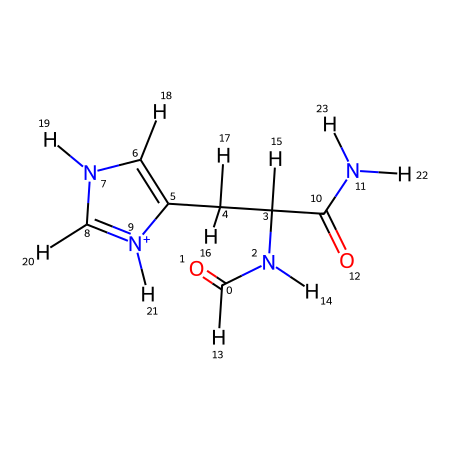

atom1_idx,atom2_idx, bond_idx, bond_type
0 1 	 0 DOUBLE
0 2 	 1 SINGLE
2 3 	 2 SINGLE
3 4 	 3 SINGLE
4 5 	 4 SINGLE
5 6 	 5 AROMATIC
6 7 	 6 AROMATIC
7 8 	 7 AROMATIC
8 9 	 8 AROMATIC
3 10 	 9 SINGLE
10 11 	 10 SINGLE
10 12 	 11 DOUBLE
9 5 	 12 AROMATIC
0 13 	 13 SINGLE
2 14 	 14 SINGLE
3 15 	 15 SINGLE
4 16 	 16 SINGLE
4 17 	 17 SINGLE
6 18 	 18 SINGLE
7 19 	 19 SINGLE
8 20 	 20 SINGLE
9 21 	 21 SINGLE
11 22 	 22 SINGLE
11 23 	 23 SINGLE


In [7]:
from rdkit import Chem
import matplotlib.pyplot as plt

from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolDraw2D
from rdkit.Chem.Draw import MolDraw2DCairo # Import MolDraw2DCairo directly

# Crear una molécula a partir de su cadena SMILES
m = Chem.MolFromSmiles('[H]C(=O)NC(CC1=CNC=[NH+]1)C(N)=O')
#m.GetBondWithIdx(0)
mol = Chem.AddHs(m)

# Ensure 2D coordinates are generated (important for drawing)
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(mol)

# Create a drawing object
# You can adjust the image size
drawer = MolDraw2DCairo(450, 450) # Use the directly imported class

# Set options to draw atom indices
options = drawer.drawOptions()
options.addAtomIndices = True

# Draw the molecule
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

# Get the image data as a byte string (using GetDrawingText)
# GetDrawingText() returns the raw PNG data as a string
img_bytes = drawer.GetDrawingText()

# Display the image using IPython.display.Image
from IPython.display import Image
display(Image(img_bytes))

# Iterar sobre cada enlace en la molécula
print("atom1_idx,atom2_idx, bond_idx, bond_type")
for bond in mol.GetBonds():
    # Obtener los índices de los átomos unidos por el enlace
    atom1_idx = bond.GetBeginAtomIdx()
    atom2_idx = bond.GetEndAtomIdx()
    bond_idx = bond.GetIdx()
    bond_type = bond.GetBondType()

    print(atom1_idx,atom2_idx, "\t",bond_idx, bond_type)
    #print(f"El índice y tipo de enlace entre el átomo {atom1_idx} y el átomo {atom2_idx} es: {bond_idx}, {bond_type}")
